In [ ]:
# starting imports
import pandas as pd
from utils.utils import Setup
from collections import Counter
from research.main import main, plot_history

In [2]:
# instantiate setup and teachers
setup = Setup()

In [3]:
# hyperparameters, can be modified
N1 = N2 = setup.N * 1  # for now N=N1=N2
batch_size = setup.P * 1
P1 = setup.P * 1
P2 = setup.P * 1
learning_rate = 1e-2
epochs1 = 500
epochs2 = 500
sgm_e = setup.sgm_e
sgm_w1 = setup.sgm_w * 1
sgm_w2 = setup.sgm_w * 2


Realisation 0/10
Lesson 1/2
Epoch 50/500
----------
train Loss: 0.0143
val Loss: 0.1824
cross_gen Loss: 0.2837


Epoch 100/500
----------
train Loss: 0.0049
val Loss: 0.1564
cross_gen Loss: 0.2845


Epoch 150/500
----------
train Loss: 0.0023
val Loss: 0.1460
cross_gen Loss: 0.2861


Epoch 200/500
----------
train Loss: 0.0013
val Loss: 0.1414
cross_gen Loss: 0.2880


Epoch 250/500
----------
train Loss: 0.0007
val Loss: 0.1394
cross_gen Loss: 0.2899


Epoch 300/500
----------
train Loss: 0.0005
val Loss: 0.1386
cross_gen Loss: 0.2915


Epoch 350/500
----------
train Loss: 0.0003
val Loss: 0.1383
cross_gen Loss: 0.2928


Epoch 400/500
----------
train Loss: 0.0002
val Loss: 0.1383
cross_gen Loss: 0.2939


Epoch 450/500
----------
train Loss: 0.0001
val Loss: 0.1385
cross_gen Loss: 0.2948


Epoch 500/500
----------
train Loss: 0.0001
val Loss: 0.1386
cross_gen Loss: 0.2955


Lesson 2/2
Epoch 50/500
----------
train Loss: 0.0260
val Loss: 0.4508
cross_gen Loss: 0.0849


Epoch 100/500
---

NameError: name 'n_runs' is not defined

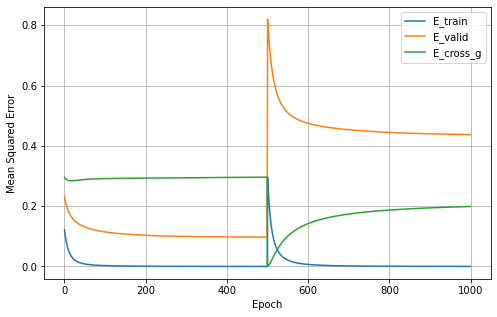

In [4]:
"""
Creates a pair of Teachers (T1, T2),
each teacher generates:
 -P examples of N-parameter random vectors X generated from normal distribution
with variance sgm_w**2
 -P examples of linear signal Y created from random vectors.
 A simple white noise with variance sgm_e**2 is added to the signals.

Generated data is splitted with 2:1 ratio for training/validation purposes.

Creates Student model, together with SGD optimizer with learning ratio lr and MSE loss function.
Prepares training, validation and cross-generalization datasets with scaling of the input vectors.

Runs 2 subsequent lessons runned for epochs1 and epochs2 time.
Returns dictionary with training, validation and cross generalization errors for full simulation
"""

n_runs=10
realisations=[]
for r in range(n_runs):
    print('Realisation {}/{}'.format(r, n_runs))
    history=main(N1, N2,
                 P1, P2,
                 sgm_w1, sgm_w2,
                 sgm_e, learning_rate,
                 epochs1, epochs2)
    realisations.append(history)
c=Counter()
for r in realisations:
    c.update(r)
# averaging over teacher realisations
errors = pd.DataFrame(c)/n_runs
plot_history(errors)